In [1]:
#Import packages for analysis and modeling 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
#Load data from csv file 

housing_df = pd.read_csv('housing.csv')

In [3]:
#Check the first 5 rows of the data
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#check for the info of the data and other structural details of the data 

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#check for missing values in the data

housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#There are missing values in the total_bedrooms column. We will fill the missing values with the median value of the column

housing_df["total_bedrooms"].fillna(housing_df["total_bedrooms"].median(), inplace=True)

In [7]:
#check for missing values in the data to be sure that there are no missing values in the data anymore
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
X = housing_df.drop('median_house_value', axis=1)
y = housing_df['median_house_value']

In [9]:
#Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
train_data = X_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4426,-118.25,34.07,18.0,4297.0,1420.0,4332.0,1286.0,2.2545,<1H OCEAN,192500.0
4429,-118.22,34.08,31.0,394.0,117.0,573.0,131.0,1.8173,<1H OCEAN,154200.0
14763,-117.10,32.59,21.0,2350.0,667.0,1621.0,613.0,2.0734,NEAR OCEAN,87500.0
13406,-117.46,34.09,8.0,4711.0,963.0,3310.0,988.0,3.5488,INLAND,101600.0
13927,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,INLAND,48100.0
...,...,...,...,...,...,...,...,...,...,...
11712,-120.15,39.17,32.0,1684.0,359.0,454.0,209.0,2.9125,INLAND,145800.0
10703,-117.71,33.60,8.0,3329.0,753.0,1312.0,629.0,3.5521,<1H OCEAN,229800.0
12406,-116.29,33.74,6.0,12991.0,2555.0,4571.0,1926.0,4.7195,INLAND,199300.0
9279,-122.60,38.11,23.0,8642.0,1294.0,3594.0,1253.0,5.3962,<1H OCEAN,301500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

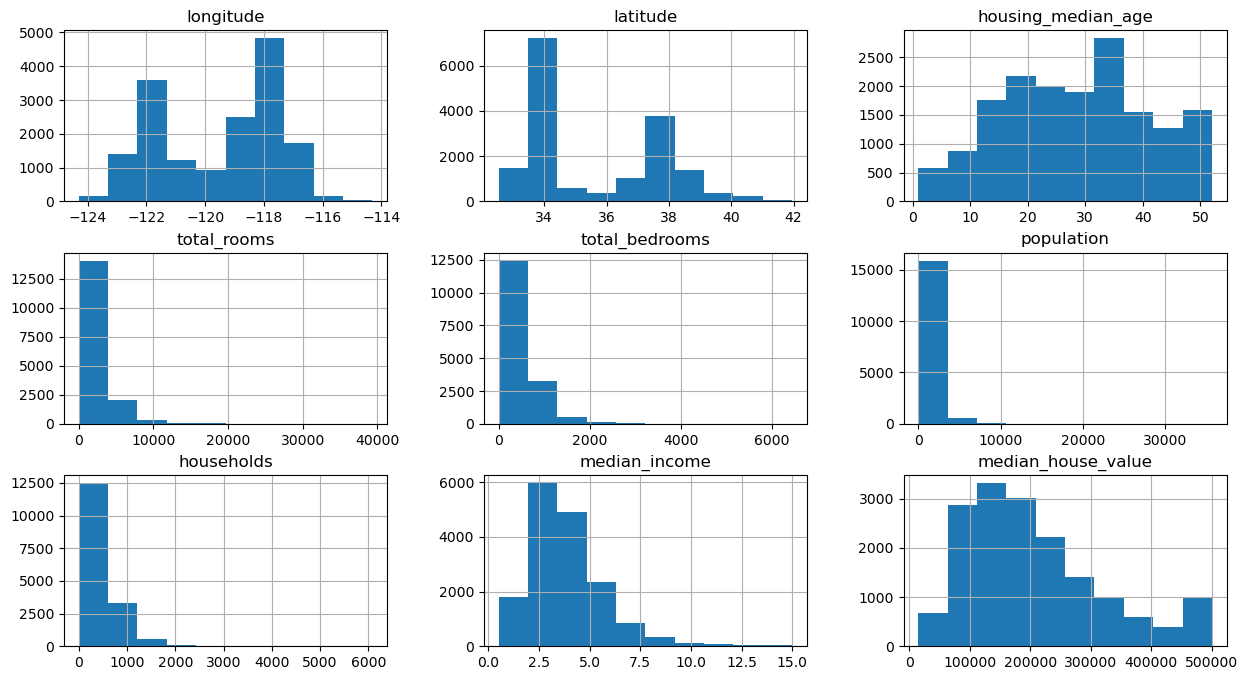

In [12]:
train_data.hist(figsize=(15,8))

/var/folders/5g/9wz_g5jn76g_3jvq2z1336zr0000gp/T/ipykernel_63248/4030865306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

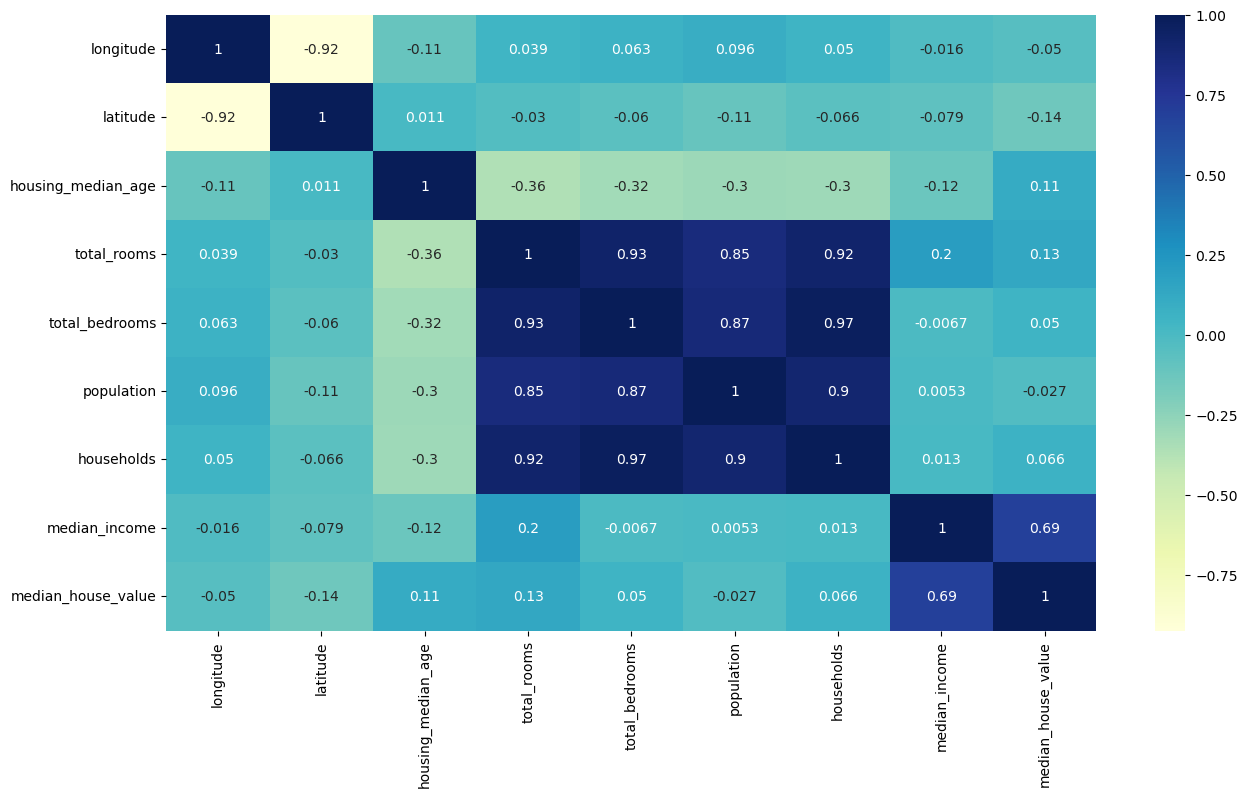

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [14]:
#If we some of the columns in the data, we can see that the data is skewed. We will use log transformation to reduce the skewness in the data, 
#and make the data more normally distributed

train_data['total_rooms'] = np.log(train_data['total_rooms'])
train_data['population'] = np.log(train_data['population'])
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'])
train_data['households'] = np.log(train_data['households'])


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

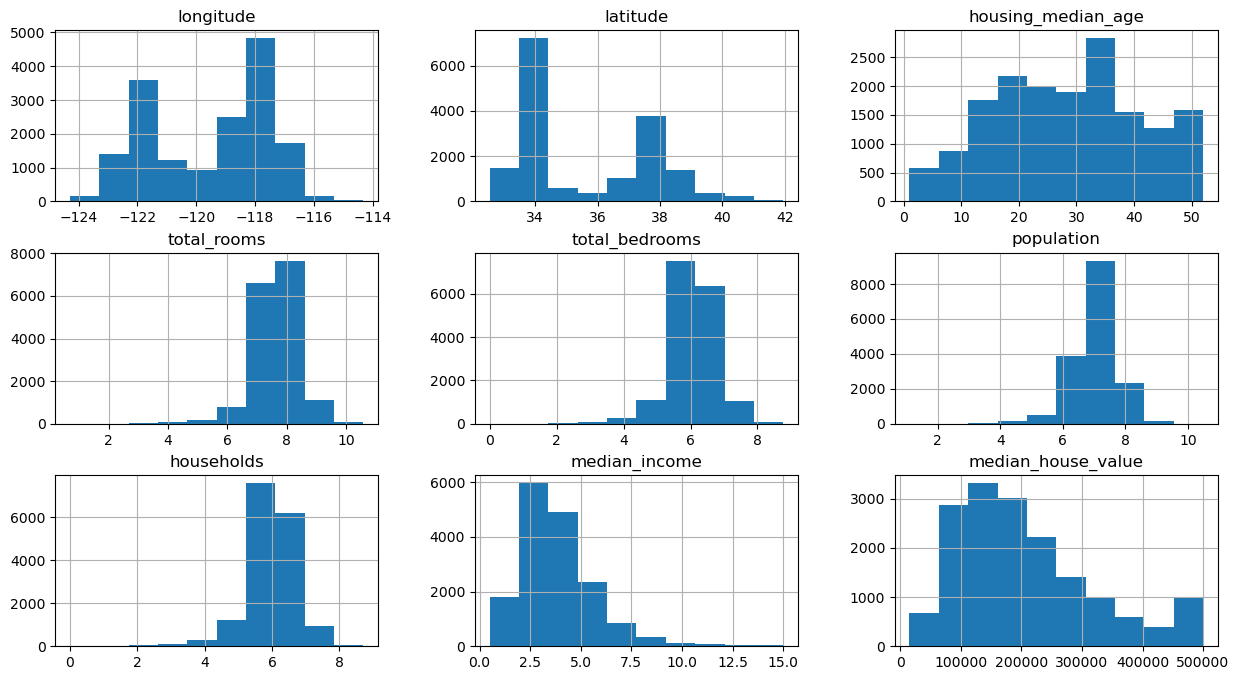

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
#checking the distribution of the data in the ocean_proximity column, we need to convert the categorical data to numerical data

train_data.ocean_proximity.value_counts()

<1H OCEAN     7324
INLAND        5199
NEAR OCEAN    2155
NEAR BAY      1829
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
#Using the pandas get_dummies function, we will convert the categorical data to numerical data

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4426,-118.25,34.07,18.0,8.365672,7.258412,8.373785,7.159292,2.2545,192500.0,1,0,0,0,0
4429,-118.22,34.08,31.0,5.976351,4.762174,6.350886,4.875197,1.8173,154200.0,1,0,0,0,0
14763,-117.10,32.59,21.0,7.762171,6.502790,7.390799,6.418365,2.0734,87500.0,0,0,0,0,1
13406,-117.46,34.09,8.0,8.457655,6.870053,8.104703,6.895683,3.5488,101600.0,0,1,0,0,0
13927,-114.60,34.83,46.0,7.311218,5.733341,6.668228,5.602119,2.1908,48100.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11712,-120.15,39.17,32.0,7.428927,5.883322,6.118097,5.342334,2.9125,145800.0,0,1,0,0,0
10703,-117.71,33.60,8.0,8.110427,6.624065,7.179308,6.444131,3.5521,229800.0,1,0,0,0,0
12406,-116.29,33.74,6.0,9.472012,7.845808,8.427487,7.563201,4.7195,199300.0,0,1,0,0,0
9279,-122.60,38.11,23.0,9.064389,7.165493,8.187021,7.133296,5.3962,301500.0,1,0,0,0,0


<Axes: >

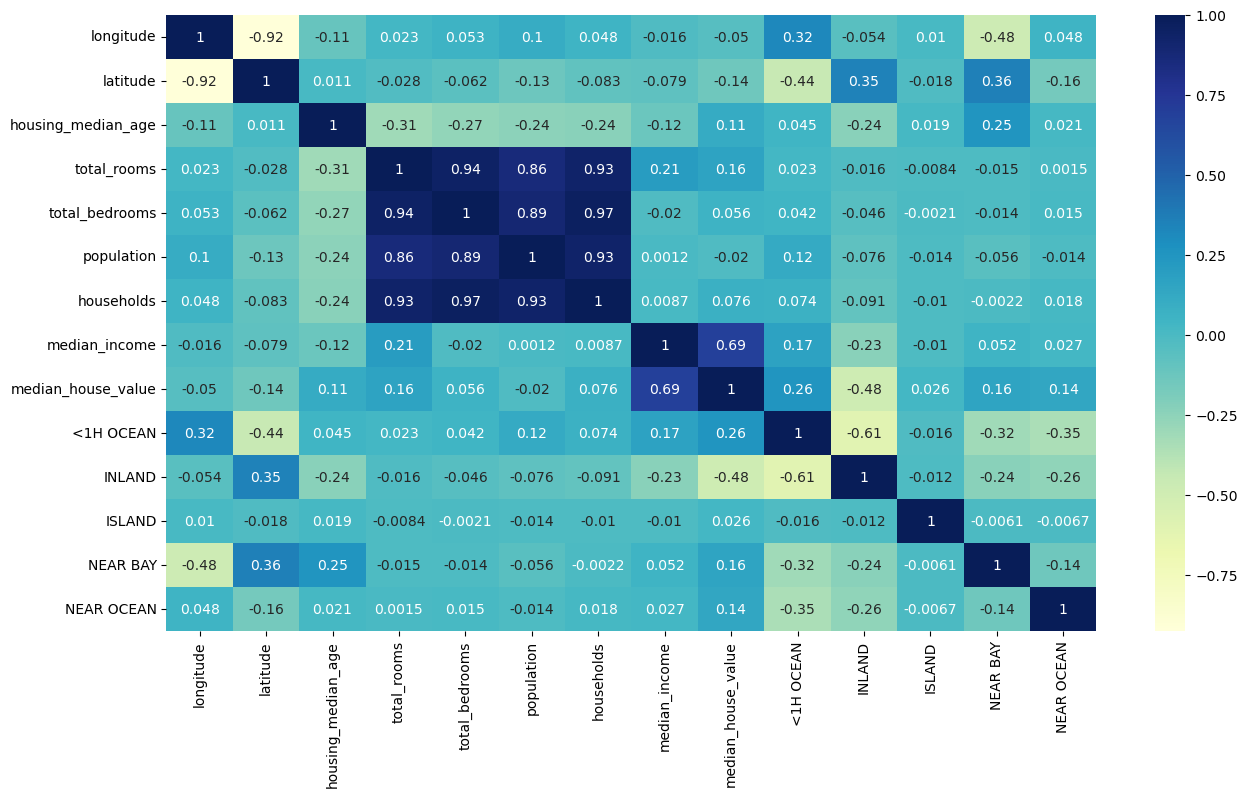

In [19]:
#Let's check the correlation of the data again, to see if there are any changes because of the new columns we added

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')